In [59]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [60]:
ad=pd.read_csv(filepath_or_buffer="./Advertising Budget and Sales.csv",index_col=[0])
ad.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [61]:
columns=["tv","radio","news","sales"]
ad.columns=columns
ad.head()

,tv,radio,news,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [62]:
ad.corr()

,tv,radio,news,sales
tv,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
news,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [63]:
import seaborn as sns

In [64]:
# sns.pairplot(kind=)

In [65]:
radio_scaler=StandardScaler().fit(X=ad[["radio"]])
radio_scaler

StandardScaler()

In [66]:
tv_scaler=StandardScaler().fit(X=ad[["tv"]])
tv_scaler

StandardScaler()

In [67]:
news_scaler=StandardScaler().fit(X=ad[["news"]])
news_scaler

StandardScaler()

In [68]:
sales_scaler=StandardScaler().fit(X=ad[["sales"]])
sales_scaler

StandardScaler()

In [69]:
df=ad.copy()
df["tv"]=tv_scaler.transform(X=ad[["tv"]])
df["radio"]=radio_scaler.transform(X=ad[["radio"]])
df["news"]=news_scaler.transform(X=ad[["news"]])
df["sales"]=sales_scaler.transform(X=ad[["sales"]])
df.head()

,tv,radio,news,sales
1,0.969852,0.981522,1.778945,1.552053
2,-1.197376,1.082808,0.669579,-0.696046
3,-1.516155,1.528463,1.783549,-0.907406
4,0.052050,1.217855,1.286405,0.860330
5,0.394182,-0.841614,1.281802,-0.215683


In [70]:
target="sales"
features=df.columns.to_list()
features.remove(target)
print(target)
print(features)

sales
['tv', 'radio', 'news']


In [71]:
X=df[features].values
Y=df[target].values
print(X[0:5, :])
print(Y[0:5,])


[[ 0.96985227  0.98152247  1.77894547]
 [-1.19737623  1.08280781  0.66957876]
 [-1.51615499  1.52846331  1.78354865]
 [ 0.05204968  1.21785493  1.28640506]
 [ 0.3941822  -0.84161366  1.28180188]]
[ 1.55205313 -0.69604611 -0.90740587  0.86033029 -0.21568303]


In [72]:
robot =LinearRegression().fit(X=X,y=Y)
robot

LinearRegression()

In [73]:
robot.score(X=X,y=Y)

0.8972106381789522

<Axes: ylabel='Density'>

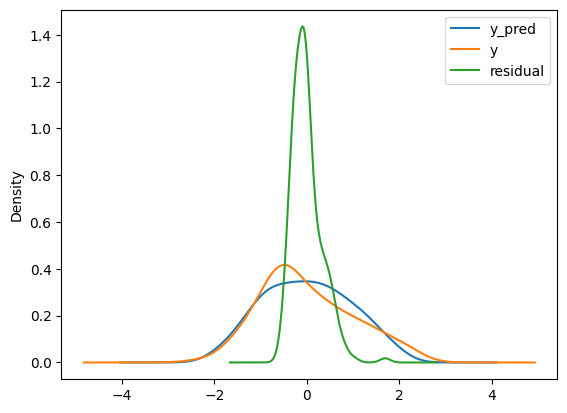

In [76]:
y_pred=robot.predict(X=X)
result=pd.DataFrame(data=dict(y_pred=y_pred,y=Y,residual=y_pred-Y,))
result.plot.kde()